In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [44]:
df = pd.read_csv("sample_data_short.csv", sep=";")
df.shape

/home/bcoelho/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11,17,18,19,20,33,34,35,36,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1349779, 57)

In [45]:
ut_avoid = {'Cancelado', 'Suspenso'}
df.query('ultima_transacao not in @ut_avoid', inplace=True)
df.shape

(1264333, 57)

In [37]:
df["cpf_remetente"].nunique()

1287

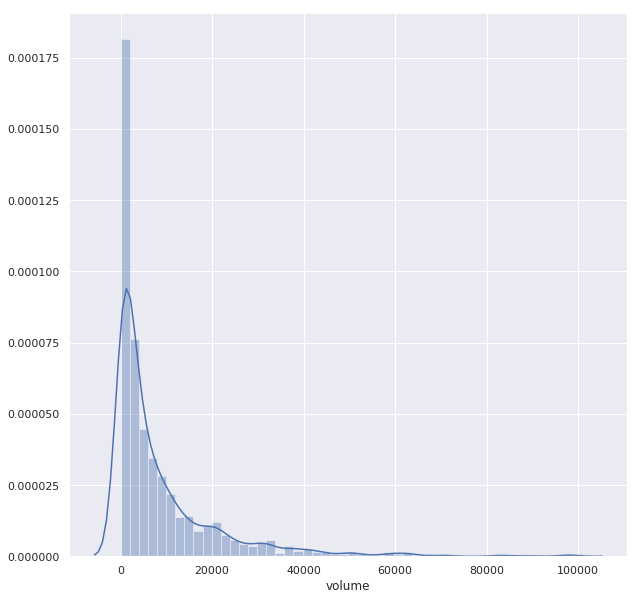

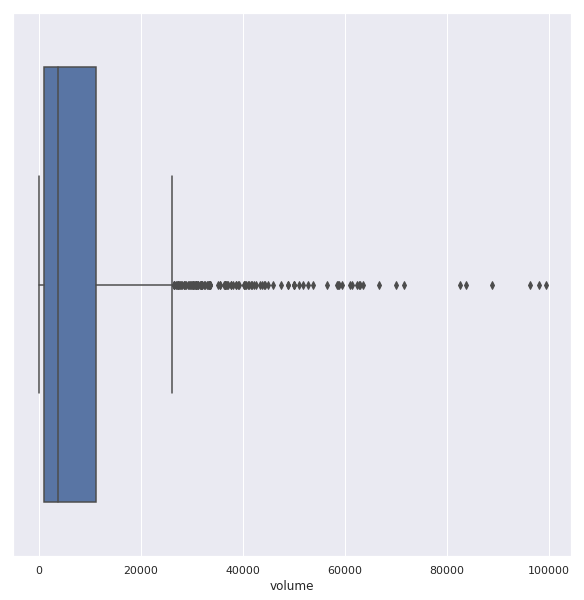

In [38]:
plt.figure(figsize=(10, 10))
sns.distplot(df.groupby("cpf_remetente")["volume"].sum())
plt.show()
plt.figure(figsize=(10, 10))
sns.boxplot(df.groupby("cpf_remetente")["volume"].sum())

In [39]:
df["produto_agrupado"].unique()

array(['Madeira serrada bruta', 'Produtos acabados de madeira', 'Tora',
       'Blocos e dormentes', 'Resíduos industriais',
       'Toretes, estacas, palanques e mourões',
       'Cavacos, lascas, cascas e rachas', 'Chapas e Lâminas de madeira',
       'Carvão e lenha'], dtype=object)

In [40]:
df["produto_agrupado"].unique()

array(['Madeira serrada bruta', 'Produtos acabados de madeira', 'Tora',
       'Blocos e dormentes', 'Resíduos industriais',
       'Toretes, estacas, palanques e mourões',
       'Cavacos, lascas, cascas e rachas', 'Chapas e Lâminas de madeira',
       'Carvão e lenha'], dtype=object)

In [41]:
(df["produto_agrupado"] == "Madeira serrada bruta").sum() / len(df)

0.5806405432745961

In [42]:
(df["produto_agrupado"] == "Tora").sum() / len(df)

0.23619014927238316

In [32]:
tora = df.query("produto_agrupado == 'Tora'").groupby("numero_serie_dof")
tora_input.head()

,id,nome_remetente,cpf_remetente,uf_origem,municipio_origem,cd_mun_origem,latitude_origem,longitude_origem,ctf_remetente,tipo_origem,nome_patio_origem,numero_serie_autex,numero_autorizacao_original,tipo_autex,orgao_emissor_autex,dt_validade_autex,numero_di,orgao_emissor_di,dt_validade_di,nome_porto_entrada,pais_origem,numero_autesp,orgao_emissor_autesp,dt_validade_autesp,uf_destino,...,nome_patio_destino,nome_porto_saida_pais,municipio_porto_destino,uf_porto_destino,pais_destino,dt_emissao,ano,dt_validade_inicial,dt_validade_final,ultima_transacao,dt_ultima_transacao,numero_oferta,numero_serie_dof,codigo_controle_dof,rota_transporte,produto,produto_agrupado,id_produto_agrupado,nome_cientifico,nome_popular,especie_agrupada,id_especie_agrupada,volume,unidade,valor
7,690803,AGROCORTEX MADEIRAS DO ACRE AGROFLORESTAL LTDA,19848073000166,AC,MANOEL URBANO,1200344,-9.381206,-69.853924,6046829,PATIO,Agrocortex AMA (Indústria),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,...,PATIO - SERRARIA SILVEIRA LTDA - ME,NaN,NaN,NaN,NaN,2017-08-04,2017,2017-08-04,2017-11-04,Recebido,2017-10-04,845735270.0,17643234,8493769119256451,MANOEL URBANO/AC-SENA MADUREIRA/AC,Tora,Tora,1,Eschweilera grandiflora,Matamatá,Biriba - Matamatá,4,15.371,M3,323.87
20,690818,AGROCORTEX MADEIRAS DO ACRE AGROFLORESTAL LTDA,19848073000166,AC,MANOEL URBANO,1200344,-9.381206,-69.853924,6046829,PATIO,Agrocortex AMA (Indústria),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,...,MARTINS E RABELO,NaN,NaN,NaN,NaN,2017-05-31,2017,2017-05-31,2017-03-06,Recebido,2017-02-06,854390860.0,17883945,3327667965883474,MANOEL URBANO/AC-RIO BRANCO/AC,Tora,Tora,1,Caryocar villosum,Pequiá,Pequiá,50,32.270,M3,1799.81
34,690833,CIBDS,367********,AC,RIO BRANCO,1200401,-10.066148,-68.371045,5888069,AUTEX-Exploração em Planos de Manejo,FAZENDA SAMAMBAIA,2.2017e+10,12012201700005,AUTEX-Exploração em Planos de Manejo,Instituto do Meio Ambiente do Acre,08/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,...,IND. E COMÉRCIO DE MADEIRAS TRIÂNGULO LTDA,NaN,NaN,NaN,NaN,2017-12-07,2017,2017-12-07,2017-07-15,Recebido,2017-07-13,855143060.0,18077131,7891219352442858,RIO BRANCO/AC-RIO BRANCO/AC,Tora,Tora,1,Eschweilera juruensis,Castanharana,Biriba - Matamatá,4,1.559,M3,15.59
35,690834,CIBDS,367********,AC,RIO BRANCO,1200401,-10.066148,-68.371045,5888069,AUTEX-Exploração em Planos de Manejo,FAZENDA SAMAMBAIA,2.2017e+10,12012201700005,AUTEX-Exploração em Planos de Manejo,Instituto do Meio Ambiente do Acre,08/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,...,IND. E COMÉRCIO DE MADEIRAS TRIÂNGULO LTDA,NaN,NaN,NaN,NaN,2017-12-07,2017,2017-12-07,2017-07-15,Recebido,2017-07-13,855143060.0,18077131,7891219352442858,RIO BRANCO/AC-RIO BRANCO/AC,Tora,Tora,1,Eschweilera odora,Castanharanavermelha,Biriba - Matamatá,4,3.440,M3,34.40
36,690835,CIBDS,367********,AC,RIO BRANCO,1200401,-10.066148,-68.371045,5888069,AUTEX-Exploração em Planos de Manejo,FAZENDA SAMAMBAIA,2.2017e+10,12012201700005,AUTEX-Exploração em Planos de Manejo,Instituto do Meio Ambiente do Acre,08/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,...,IND. E COMÉRCIO DE MADEIRAS TRIÂNGULO LTDA,NaN,NaN,NaN,NaN,2017-12-07,2017,2017-12-07,2017-07-15,Recebido,2017-07-13,855143060.0,18077131,7891219352442858,RIO BRANCO/AC-RIO BRANCO/AC,Tora,Tora,1,Apuleia molaris,Garapeira,Garapeira,117,1.212,M3,12.12


In [10]:
idx = df["id_produto_agrupado"] == 12
b = df.loc[idx].groupby(["cd_mun_origem", "especie_agrupada"])[["volume"]].sum()

In [63]:
idx.sum() / len(df)

0.45098698573583673

In [43]:
#(b.unstack().isna().sum(axis=0) == 0).sum()
(b.unstack().isna().sum(axis=0) == 0).sum()

0

In [125]:
b_unst = b.unstack()
cols = b_unst.columns.get_level_values(1).values
b_unst = pd.DataFrame(b_unst.values, columns=cols, index=b_unst.index)

In [126]:
b_unst.shape

(69, 98)

In [127]:
percent_nan = (b_unst.isna().sum(axis=0) / b_unst.shape[0]).sort_values(ascending=False)
(b_unst.isna().sum(axis=0) / b_unst.shape[0]).sort_values(ascending=False)

Tuia da China                    0.985507
Pau sangue                       0.985507
Aroeira                          0.971014
Sucupira branca                  0.956522
Jacarandá                        0.956522
Araucaria                        0.956522
Sansão do campo                  0.942029
Cedro faia                       0.927536
Angelim rajado                   0.927536
Seringueira                      0.927536
Mogno brasileiro                 0.913043
Catuaba                          0.913043
Cambará                          0.898551
Araçás e correlatos              0.884058
Pau marfim                       0.884058
Cardeiro                         0.869565
Teca                             0.869565
Acapu                            0.855072
Louro amarelo                    0.840580
Melancieiro                      0.826087
Cacau-cupuaçu                    0.826087
Guarapari                        0.826087
Assacu                           0.811594
Guaribu                          0

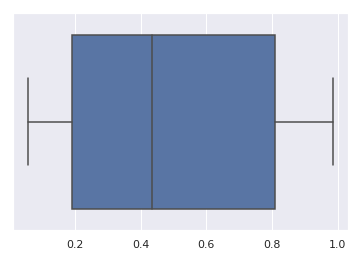

In [128]:
sns.boxplot(percent_nan)

In [154]:
print(b_unst.sum(axis=1).isna().sum())
df_norm = pd.DataFrame(b_unst.values / b_unst.sum(axis=1).values[:, None],
                      columns=b_unst.columns, index=b_unst.index)

0


In [155]:
df_norm.head()

,Abiu,Acapu,Acariquara,Aguaí - bacumixá,Amaparana,Andiroba,Angelim amargoso,Angelim pedra,Angelim rajado,Angelim vermelho,Angico tataré,Araucaria,Araçás e correlatos,Aroeira,Assacu,Açoita cavalo,Biriba - Matamatá,Cabreúva,Cacau-cupuaçu,Cajus e cajuaçus,Cajás,Cambará,Canafístula,Cardeiro,Catuaba,...,Pau rosa,Pau sangue,Pequiá,Peroba,Quaruba,Roxinho,Sansão do campo,Seringueira,Sucupira,Sucupira branca,Sucupira vermelha,Tachi,Tachi branco,Tamarindo,Tanimbuca,Tatajuba,Tauari,Teca,Timborana,Tuia da China,Uchi,Ucuubarana,Uxirana,Virola,cedrinho
cd_mun_origem,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1100015,0.003940,NaN,NaN,NaN,NaN,NaN,0.006890,0.011418,NaN,NaN,NaN,NaN,NaN,0.005156,NaN,0.004588,0.000186,0.000502,NaN,0.000381,0.004171,NaN,NaN,NaN,NaN,...,0.001639,NaN,0.001466,0.024556,0.000278,NaN,NaN,NaN,0.008154,NaN,0.001157,0.000066,NaN,0.000001,0.009827,NaN,0.011819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057879
1100023,0.026306,0.000309,0.000081,0.000014,0.002874,NaN,0.008524,0.037359,NaN,0.049952,0.00002,0.000013,NaN,NaN,NaN,0.001422,0.002336,0.000014,0.000022,0.001131,0.000031,2.274580e-06,0.000158,0.000037,0.000002,...,0.000571,NaN,0.015195,0.001918,0.002592,0.044316,NaN,0.000027,0.005185,NaN,0.000682,0.030737,0.000409,0.000870,0.018790,0.001875,0.286043,0.000079,0.0001,NaN,0.001404,0.002809,0.000007,0.000846,0.010618
1100031,NaN,NaN,NaN,NaN,NaN,NaN,0.003053,0.013415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.033980,0.006725,NaN,NaN,NaN,NaN,0.003788,NaN,NaN,0.008284,NaN,NaN,0.007823,NaN,0.000630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005216
1100049,0.015743,NaN,NaN,NaN,0.001100,0.000062,0.007185,0.035666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001500,0.000285,0.000237,NaN,0.003459,0.000044,1.205720e-08,0.000123,NaN,NaN,...,0.001997,NaN,0.027658,0.016398,0.001923,0.018062,NaN,NaN,0.003499,NaN,0.000016,0.004149,0.000080,0.000320,0.020604,0.011434,0.153579,NaN,NaN,NaN,0.000144,NaN,NaN,NaN,0.033885
1100056,0.000508,NaN,NaN,NaN,0.000213,NaN,0.007218,0.038763,NaN,0.000291,NaN,NaN,NaN,NaN,NaN,0.001234,0.000830,NaN,NaN,0.001250,NaN,NaN,0.000115,NaN,NaN,...,0.000899,NaN,0.038865,0.002400,0.002415,0.051290,NaN,NaN,0.003564,NaN,NaN,0.003575,NaN,0.001076,0.002991,0.005721,0.056217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030254


In [172]:
df_norm.corr().isna().sum() == 2

Abiu                         True
Acapu                       False
Acariquara                  False
Aguaí - bacumixá            False
Amaparana                   False
Andiroba                    False
Angelim amargoso             True
Angelim pedra                True
Angelim rajado              False
Angelim vermelho            False
Angico tataré               False
Araucaria                   False
Araçás e correlatos         False
Aroeira                     False
Assacu                      False
Açoita cavalo                True
Biriba - Matamatá            True
Cabreúva                    False
Cacau-cupuaçu               False
Cajus e cajuaçus             True
Cajás                       False
Cambará                     False
Canafístula                 False
Cardeiro                    False
Catuaba                     False
Caucho - inharé vermelho     True
Cedro                        True
Cedro faia                  False
Cedrorana                    True
Cerejeira     

In [179]:
df_corr = df_norm.corr()
valid = df_corr.isna().sum() == 2
df_corr = df_corr.loc[valid.values, valid[valid].index.values]
df_corr.head()

,Abiu,Angelim amargoso,Angelim pedra,Açoita cavalo,Biriba - Matamatá,Cajus e cajuaçus,Caucho - inharé vermelho,Cedro,Cedrorana,Cerejeira,Copaíba,Cumaru,Cupiúba,Espécies mistas brancas,Espécies mistas não declarada,Farinha seca,Fava orelha de macaco,Gameleiro,Garapeira,Guanandi,Guatambu,Imbuias e canelas,Ipê,Itaúba,Jatobá,Jitaí e jutaí,Louro vermelho,Mandioqueiro,Marupá,Maçaranduba,Morototó,Muiracatiara,Muirapitanga e Amapá,Outras espécies nativas,Parapará,Paricá,Pau rosa,Pequiá,Peroba,Quaruba,Sucupira,Sucupira vermelha,Tachi,Tamarindo,Tanimbuca,Tauari,cedrinho
Abiu,1.000000,0.492333,-0.066043,-0.105779,-0.148810,0.002227,0.480634,-0.098902,-0.075637,-0.036607,-0.168847,-0.244158,-0.277814,0.236317,0.180566,-0.086219,0.028251,-0.199084,-0.280595,-0.072206,-0.134661,-0.072727,-0.005406,-0.118418,0.036755,0.352634,-0.026690,-0.192768,0.089747,-0.073531,0.341434,0.276442,-0.136018,0.105447,0.008943,0.002729,0.116471,-0.148012,-0.147892,-0.045794,-0.099121,0.198260,0.144347,0.030633,0.286413,-0.013326,-0.093973
Angelim amargoso,0.492333,1.000000,0.196975,-0.094482,-0.387718,-0.144344,0.137893,-0.166165,0.225694,-0.159096,-0.278360,-0.322769,-0.003335,0.057119,0.348775,0.089773,0.154337,0.218359,-0.310455,0.129697,0.267913,0.016938,0.047744,-0.071767,-0.182512,0.296156,0.187300,0.050244,0.209826,-0.185699,0.166841,0.160258,-0.127457,-0.031607,0.134901,0.012650,-0.025360,-0.260635,-0.034270,-0.038972,0.092506,0.379920,0.029642,0.266516,0.009430,0.060059,0.205115
Angelim pedra,-0.066043,0.196975,1.000000,-0.318863,-0.371190,-0.150324,-0.317148,-0.300539,0.263029,-0.375871,-0.405921,-0.319920,0.405508,-0.357153,0.008755,-0.361665,-0.120677,-0.020313,0.099206,-0.095568,0.022367,-0.254255,0.182990,-0.091781,-0.192664,0.013133,-0.183565,-0.052813,-0.007609,0.171379,0.104184,0.306121,-0.179527,-0.372009,-0.285969,-0.216196,-0.097078,0.001575,-0.418127,-0.042055,0.198306,-0.113228,-0.042268,0.028517,-0.125168,0.383609,0.078900
Açoita cavalo,-0.105779,-0.094482,-0.318863,1.000000,-0.177825,0.543979,0.271025,0.062837,-0.185317,0.259443,-0.021285,-0.186351,-0.138024,0.263969,-0.172926,0.239196,0.094911,-0.009772,0.076523,-0.061176,0.016811,0.087715,-0.034959,-0.192504,0.104141,-0.051160,-0.077584,0.075689,0.004873,-0.190584,-0.126787,-0.068097,0.130919,0.301280,0.097002,0.117544,-0.210177,-0.041359,0.280974,0.056961,-0.158232,-0.147089,0.142332,0.266329,0.122064,-0.162763,-0.114798
Biriba - Matamatá,-0.148810,-0.387718,-0.371190,-0.177825,1.000000,-0.042754,0.219002,0.559779,-0.225693,0.499870,0.747642,0.530377,-0.086730,0.196746,-0.042052,0.004833,-0.155809,0.119481,0.493150,-0.056801,-0.015521,-0.253919,0.097204,-0.142249,0.252331,0.172871,-0.037066,-0.226258,-0.209154,-0.085226,-0.190757,-0.253044,0.176078,-0.069532,-0.081368,-0.251443,-0.090183,-0.093819,0.056147,-0.175911,-0.321459,-0.092484,-0.100165,-0.151960,-0.253230,-0.221972,-0.232416


In [180]:
df_corr.isna().sum().sum()

0

In [181]:
df_corr.shape

(47, 47)

In [186]:
df_corr = (df_corr + 1) / 2

In [191]:
wanted_species = df_corr.columns
df_corr.head()

,Abiu,Angelim amargoso,Angelim pedra,Açoita cavalo,Biriba - Matamatá,Cajus e cajuaçus,Caucho - inharé vermelho,Cedro,Cedrorana,Cerejeira,Copaíba,Cumaru,Cupiúba,Espécies mistas brancas,Espécies mistas não declarada,Farinha seca,Fava orelha de macaco,Gameleiro,Garapeira,Guanandi,Guatambu,Imbuias e canelas,Ipê,Itaúba,Jatobá,Jitaí e jutaí,Louro vermelho,Mandioqueiro,Marupá,Maçaranduba,Morototó,Muiracatiara,Muirapitanga e Amapá,Outras espécies nativas,Parapará,Paricá,Pau rosa,Pequiá,Peroba,Quaruba,Sucupira,Sucupira vermelha,Tachi,Tamarindo,Tanimbuca,Tauari,cedrinho
Abiu,1.000000,0.746166,0.466979,0.447110,0.425595,0.501113,0.740317,0.450549,0.462182,0.481696,0.415576,0.377921,0.361093,0.618158,0.590283,0.456891,0.514125,0.400458,0.359702,0.463897,0.432669,0.463637,0.497297,0.440791,0.518377,0.676317,0.486655,0.403616,0.544874,0.463235,0.670717,0.638221,0.431991,0.552724,0.504471,0.501364,0.558236,0.425994,0.426054,0.477103,0.450440,0.599130,0.572174,0.515316,0.643207,0.493337,0.453013
Angelim amargoso,0.746166,1.000000,0.598488,0.452759,0.306141,0.427828,0.568946,0.416918,0.612847,0.420452,0.360820,0.338615,0.498333,0.528559,0.674388,0.544887,0.577168,0.609179,0.344772,0.564848,0.633957,0.508469,0.523872,0.464117,0.408744,0.648078,0.593650,0.525122,0.604913,0.407150,0.583420,0.580129,0.436271,0.484197,0.567451,0.506325,0.487320,0.369683,0.482865,0.480514,0.546253,0.689960,0.514821,0.633258,0.504715,0.530030,0.602557
Angelim pedra,0.466979,0.598488,1.000000,0.340568,0.314405,0.424838,0.341426,0.349730,0.631514,0.312064,0.297040,0.340040,0.702754,0.321423,0.504377,0.319167,0.439661,0.489843,0.549603,0.452216,0.511183,0.372873,0.591495,0.454110,0.403668,0.506566,0.408217,0.473594,0.496196,0.585690,0.552092,0.653060,0.410236,0.313995,0.357015,0.391902,0.451461,0.500787,0.290937,0.478973,0.599153,0.443386,0.478866,0.514258,0.437416,0.691805,0.539450
Açoita cavalo,0.447110,0.452759,0.340568,1.000000,0.411088,0.771990,0.635512,0.531418,0.407342,0.629722,0.489358,0.406824,0.430988,0.631984,0.413537,0.619598,0.547455,0.495114,0.538262,0.469412,0.508405,0.543857,0.482521,0.403748,0.552070,0.474420,0.461208,0.537844,0.502437,0.404708,0.436606,0.465951,0.565459,0.650640,0.548501,0.558772,0.394912,0.479321,0.640487,0.528481,0.420884,0.426455,0.571166,0.633165,0.561032,0.418619,0.442601
Biriba - Matamatá,0.425595,0.306141,0.314405,0.411088,1.000000,0.478623,0.609501,0.779890,0.387154,0.749935,0.873821,0.765189,0.456635,0.598373,0.478974,0.502416,0.422095,0.559741,0.746575,0.471599,0.492239,0.373041,0.548602,0.428875,0.626165,0.586436,0.481467,0.386871,0.395423,0.457387,0.404621,0.373478,0.588039,0.465234,0.459316,0.374278,0.454909,0.453091,0.528074,0.412044,0.339271,0.453758,0.449918,0.424020,0.373385,0.389014,0.383792


In [202]:
log_volume = np.log10(b_unst.sum(axis=0))[wanted_species]

# Create csv files

In [219]:
df_nodes = pd.DataFrame()
df_nodes["Id"] = wanted_species
df_nodes["Label"] = wanted_species
df_nodes["LogTotVol"] = log_volume.values

df_nodes.to_csv("nodes.csv", index=False)
df_nodes.head()

,Id,Label,LogTotVol
0,Abiu,Abiu,5.405160
1,Angelim amargoso,Angelim amargoso,4.933494
2,Angelim pedra,Angelim pedra,5.853225
3,Açoita cavalo,Açoita cavalo,4.087448
4,Biriba - Matamatá,Biriba - Matamatá,4.724788


In [220]:
idx = ~np.triu(np.ones(df_corr.shape)).astype(np.bool)
df_edges = df_corr.where(idx).stack().reset_index()
df_edges.columns= ["Source", "Target", "Weight"]
df_edges.head()

,Source,Target,Weight
0,Angelim amargoso,Abiu,0.746166
1,Angelim pedra,Abiu,0.466979
2,Angelim pedra,Angelim amargoso,0.598488
3,Açoita cavalo,Abiu,0.447110
4,Açoita cavalo,Angelim amargoso,0.452759


In [221]:
df_edges.to_csv("edges.csv", index=False)

In [223]:
print("hi")

hi
